# 𝐈𝐌𝐏𝐎𝐑𝐓 𝐋𝐈𝐁𝐑𝐀𝐑𝐈𝐄𝐒



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import os
import glob
import random

/Users/devayushrout/Desktop/PROJECT EXHIBITION/resunet/myenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# 𝐃𝐀𝐓𝐀 𝐏𝐑𝐎𝐂𝐄𝐒𝐒𝐈𝐍𝐆


In [2]:
# data containing path to Brain MRI and their corresponding mask
brain_df = pd.read_csv('/Users/devayushrout/Desktop/PROJECT EXHIBITION/resunet/lgg-mri-segmentation/kaggle_3m/data_mask.csv')
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB


In [3]:
brain_df

patient_id  \
0     TCGA_CS_5395_19981004   
1     TCGA_CS_5395_19981004   
2     TCGA_CS_5395_19981004   
3     TCGA_CS_5395_19981004   
4     TCGA_CS_5395_19981004   
...                     ...   
3924  TCGA_DU_6401_19831001   
3925  TCGA_DU_6401_19831001   
3926  TCGA_DU_6401_19831001   
3927  TCGA_DU_6401_19831001   
3928  TCGA_DU_6401_19831001   

                                             image_path  \
0     TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif   
1     TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif   
2     TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif   
3     TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif   
4     TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif   
...                                                 ...   
3924  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...   
3925  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...   
3926  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...   
3927  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...   
3928  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...   

                                              mask_path  mask  
0     TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...     0  
1     TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...     0  
2     TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...     0  
3     TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...     0  
4     TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...     0  
...                                                 ...   ...  
3924  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...     0  
3925  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...     0  
3926  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...     0  
3927  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...     0  
3928  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...     0  

[3929 rows x 4 columns]

In [4]:
data = pd.read_csv('/Users/devayushrout/Desktop/PROJECT EXHIBITION/traial new/lgg-mri-segmentation/kaggle_3m/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient                    110 non-null    object 
 1   RNASeqCluster              92 non-null     float64
 2   MethylationCluster         109 non-null    float64
 3   miRNACluster               110 non-null    int64  
 4   CNCluster                  108 non-null    float64
 5   RPPACluster                98 non-null     float64
 6   OncosignCluster            105 non-null    float64
 7   COCCluster                 110 non-null    int64  
 8   histological_type          109 non-null    float64
 9   neoplasm_histologic_grade  109 non-null    float64
 10  tumor_tissue_site          109 non-null    float64
 11  laterality                 109 non-null    float64
 12  tumor_location             109 non-null    float64
 13  gender                     109 non-null    float64

In [5]:
brain_df['mask'].value_counts()

mask
0    2556
1    1373
Name: count, dtype: int64

In [6]:
import plotly.graph_objects as go  # using plotly to create interactive plots

fig = go.Figure([go.Bar(x=brain_df['mask'].value_counts().index, 
                        y=brain_df['mask'].value_counts(), 
                        width=[.4, .4]
                    )
                ])
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                marker_line_width=4, opacity=0.4
                )
fig.update_layout(title_text="Mask Count Plot",
                width=700,
                height=550,
                yaxis=dict(
                            title_text="Count",
                            tickmode="array",
                            titlefont=dict(size=20)
                        )
        )
fig.update_yaxes(automargin=True)
fig.show()

# 𝐕𝐈𝐒𝐔𝐀𝐋𝐈𝐒𝐀𝐓𝐈𝐎𝐍


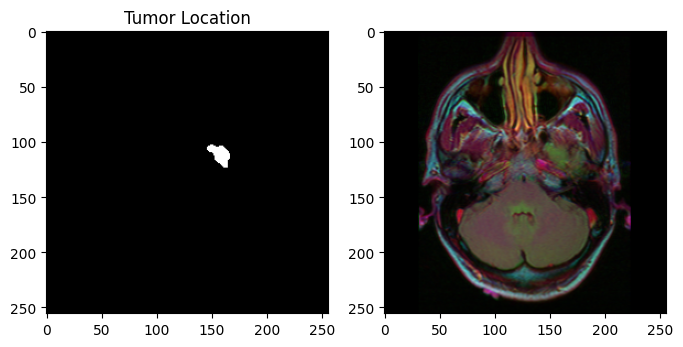

In [7]:
for i in range(len(brain_df)):
    if cv2.imread(brain_df.mask_path[i]).max() > 0:
        break

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(cv2.imread(brain_df.mask_path[i]));
plt.title('Tumor Location')

plt.subplot(1,2,2)
plt.imshow(cv2.imread(brain_df.image_path[i]));

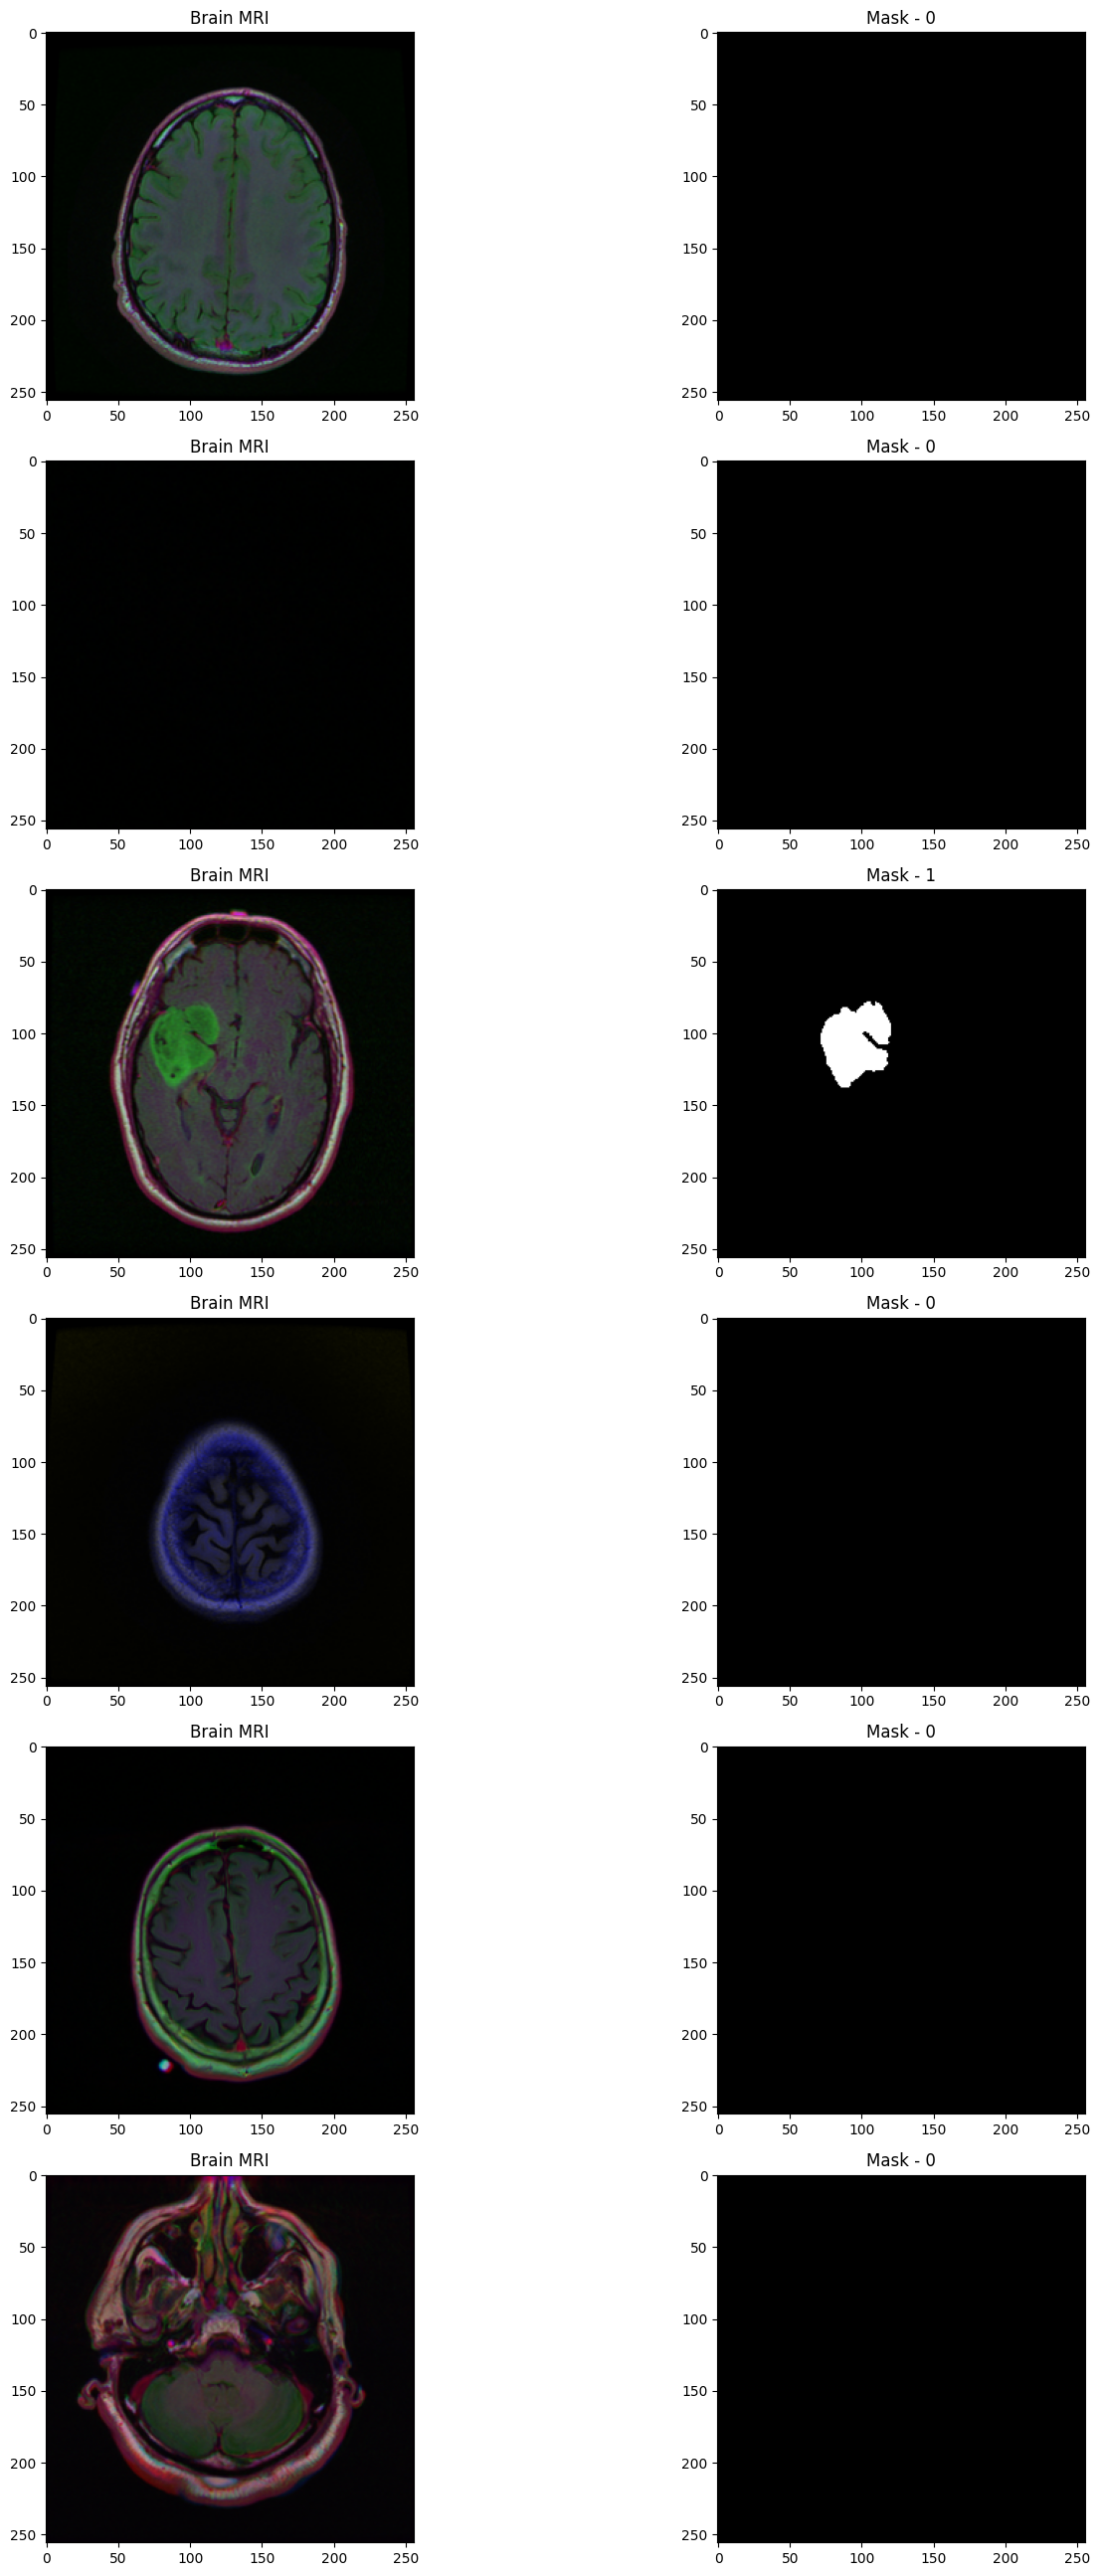

In [8]:
# Basic visualizations: Visualize the images (MRI and Mask) in the dataset separately 

fig, axs = plt.subplots(6,2, figsize=(16,26))
count = 0
for x in range(6):
  i = random.randint(0, len(brain_df)) # select a random index
  axs[count][0].title.set_text("Brain MRI") # set title
  axs[count][0].imshow(cv2.imread(brain_df.image_path[i])) # show MRI 
  axs[count][1].title.set_text("Mask - " + str(brain_df['mask'][i])) # plot title on the mask (0 or 1)
  axs[count][1].imshow(cv2.imread(brain_df.mask_path[i])) # Show corresponding mask
  count += 1

fig.tight_layout()

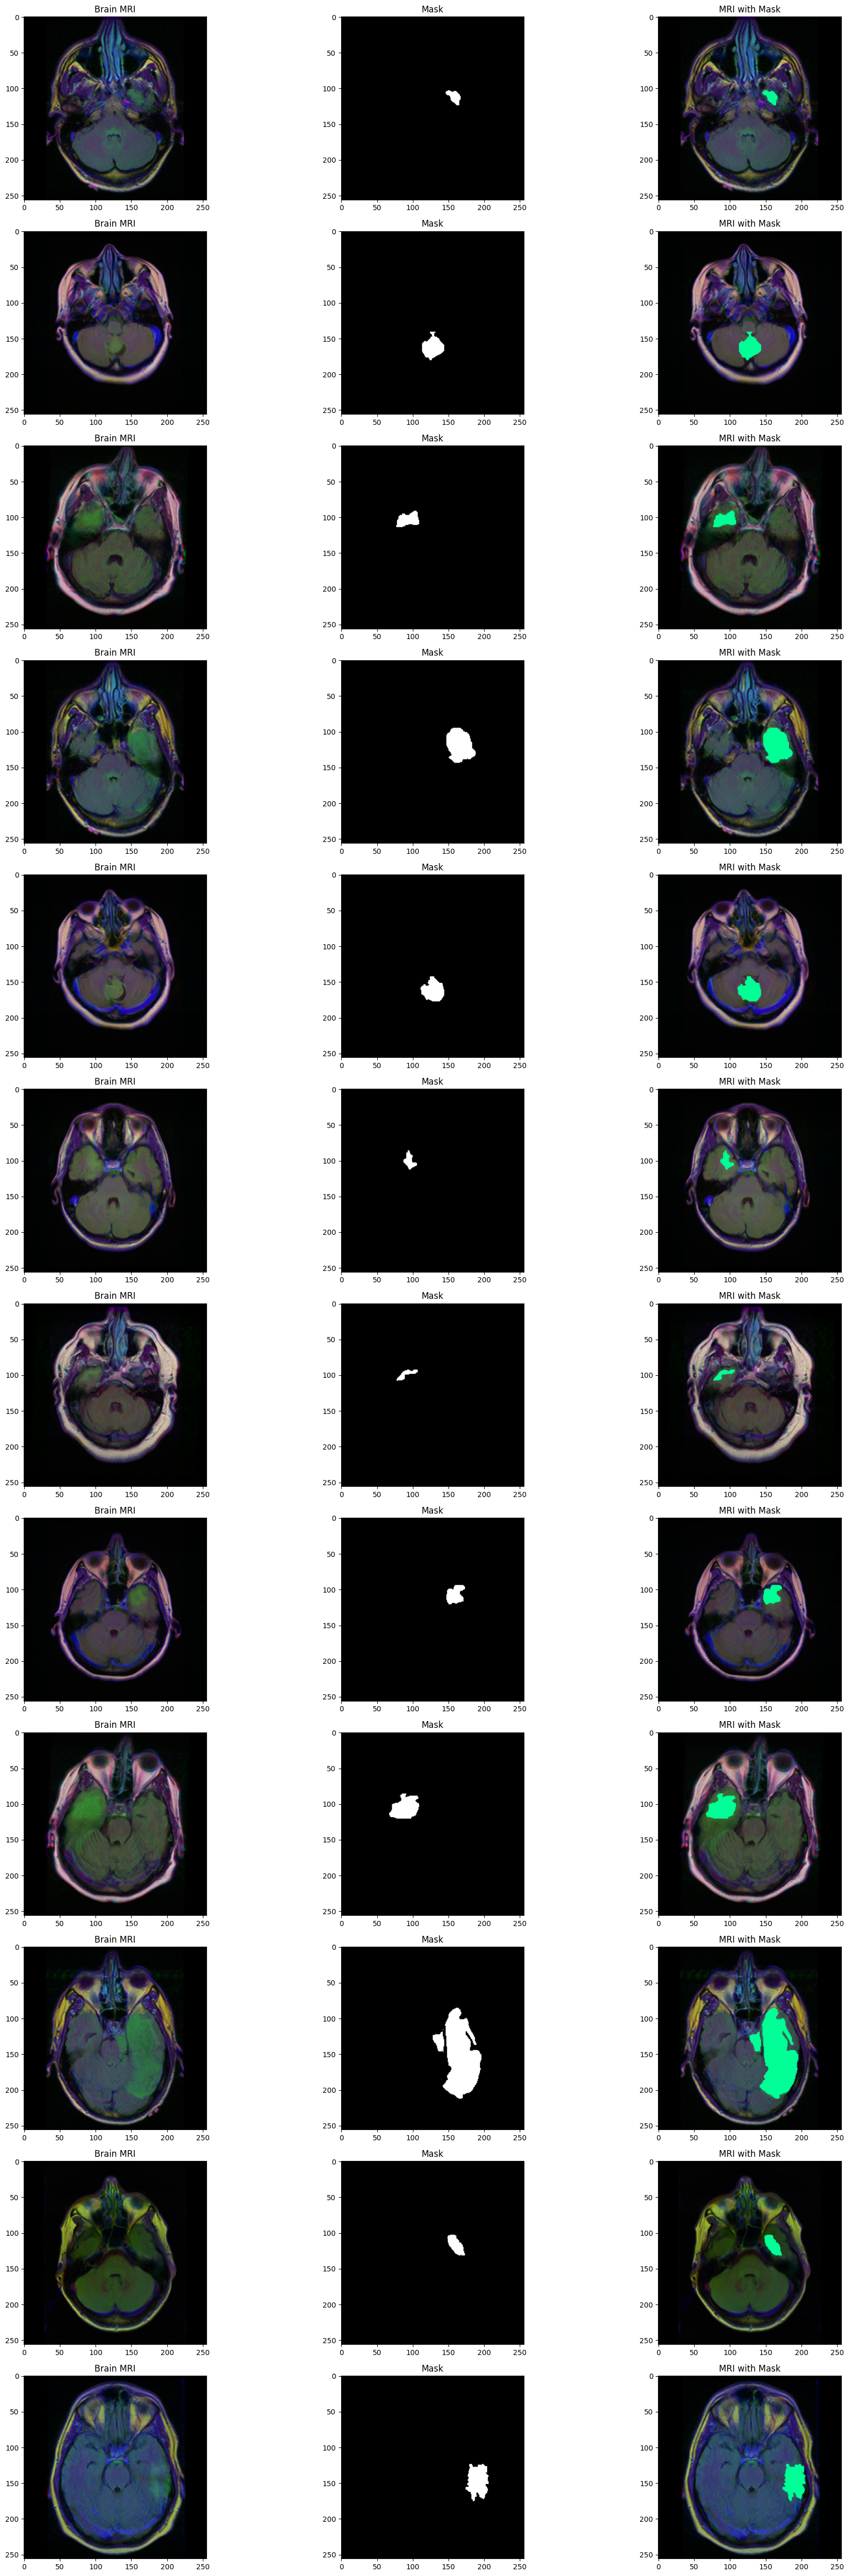

In [9]:
count = 0
i = 0
fig,axs = plt.subplots(12,3, figsize=(20,50))
for mask in brain_df['mask']:
    if (mask==1):
        img = io.imread(brain_df.image_path[i])
        axs[count][0].title.set_text("Brain MRI")
        axs[count][0].imshow(img)
        
        mask = io.imread(brain_df.mask_path[i])
        axs[count][1].title.set_text("Mask")
        axs[count][1].imshow(mask, cmap='gray')
        
        img[mask==255] = (0,255,150)  # change pixel color at the position of mask
        axs[count][2].title.set_text("MRI with Mask")
        axs[count][2].imshow(img)
        count +=1
    i += 1
    if (count==12):
        break
        
fig.tight_layout()

# 𝐒𝐏𝐋𝐈𝐓

In [10]:
brain_df_train = brain_df.drop(columns=['patient_id'])
# Convert the data in mask column to string format, to use categorical mode in flow_from_dataframe
brain_df_train['mask'] = brain_df_train['mask'].apply(lambda x: str(x))
brain_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [11]:
# split the data into train and test data

from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(brain_df_train, test_size=0.15)
X_test, X_val = train_test_split(X_val, test_size=0.5)

In [12]:
# create separate list for imageId, classId to pass into the generator

train_ids = list(X_train.image_path)
train_mask = list(X_train.mask_path)

val_ids = list(X_val.image_path)
val_mask= list(X_val.mask_path)

# 𝐃𝐀𝐓𝐀 𝐆𝐄𝐍𝐄𝐑𝐀𝐓𝐎𝐑



In [13]:
class DataGenerator(tf.keras.utils.Sequence):
  def __init__(self, ids , mask, image_dir = './', batch_size = 16, img_h = 256, img_w = 256, shuffle = True):

    self.ids = ids
    self.mask = mask
    self.image_dir = image_dir
    self.batch_size = batch_size
    self.img_h = img_h
    self.img_w = img_w
    self.shuffle = shuffle
    self.on_epoch_end()

  def __len__(self):
    'Get the number of batches per epoch'

    return int(np.floor(len(self.ids)) / self.batch_size)

  def __getitem__(self, index):
    'Generate a batch of data'

    #generate index of batch_size length
    indexes = self.indexes[index* self.batch_size : (index+1) * self.batch_size]

    #get the ImageId corresponding to the indexes created above based on batch size
    list_ids = [self.ids[i] for i in indexes]

    #get the MaskId corresponding to the indexes created above based on batch size
    list_mask = [self.mask[i] for i in indexes]


    #generate data for the X(features) and y(label)
    X, y = self.__data_generation(list_ids, list_mask)

    #returning the data
    return X, y

  def on_epoch_end(self):
    'Used for updating the indices after each epoch, once at the beginning as well as at the end of each epoch'
    
    #getting the array of indices based on the input dataframe
    self.indexes = np.arange(len(self.ids))

    #if shuffle is true, shuffle the indices
    if self.shuffle:
      np.random.shuffle(self.indexes)

  def __data_generation(self, list_ids, list_mask):
    'generate the data corresponding the indexes in a given batch of images'

    # create empty arrays of shape (batch_size,height,width,depth) 
    #Depth is 3 for input and depth is taken as 1 for output becasue mask consist only of 1 channel.
    X = np.empty((self.batch_size, self.img_h, self.img_w, 3))
    y = np.empty((self.batch_size, self.img_h, self.img_w, 1))

    #iterate through the dataframe rows, whose size is equal to the batch_size
    for i in range(len(list_ids)):
    #path of the image
        img_path = os.path.join(self.image_dir, str(list_ids[i]))
    
    #mask path
        mask_path = os.path.join(self.image_dir, str(list_mask[i]))

    #reading the original image and the corresponding mask image
        img = io.imread(img_path)
        mask = io.imread(mask_path)

      #resizing and coverting them to array of type float64
        img = cv2.resize(img,(self.img_h,self.img_w))
        img = np.array(img, dtype = np.float64)
      
        mask = cv2.resize(mask,(self.img_h,self.img_w))
        mask = np.array(mask, dtype = np.float64)

      #standardising 
        img -= img.mean()
        img /= img.std()
      
        mask -= mask.mean()
        mask /= mask.std()
      
      #Adding image to the empty array
        X[i,] = img
      
      #expanding the dimnesion of the image from (256,256) to (256,256,1)
        y[i,] = np.expand_dims(mask, axis = 2)
    
    #normalizing y
    y = (y > 0).astype(int)

    return X, y

training_generator = DataGenerator(train_ids, train_mask)
validation_generator = DataGenerator(val_ids, val_mask)

# 𝐇𝐘𝐃𝐑𝐀𝐍 𝐌𝐎𝐃𝐄𝐋
## (HYbrid Dual-Residual Attention Network)

In [14]:
#MAIN MODEL

from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, UpSampling2D, Concatenate, Add, GlobalAveragePooling2D, GlobalMaxPooling2D, Dense, Multiply, Dropout, Reshape, Permute, Softmax
from tensorflow.keras.models import Model
from tensorflow.keras.activations import swish

# Define simplified residual block with SE
def resblock(X, filters):
    X_copy = X
    X = Conv2D(filters, kernel_size=(1,1), padding="same", kernel_initializer="he_normal")(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    X = Conv2D(filters, kernel_size=(3,3), padding="same", kernel_initializer="he_normal")(X)
    X = BatchNormalization()(X)

    X_copy = Conv2D(filters, kernel_size=(1,1), padding="same", kernel_initializer="he_normal")(X_copy)
    X_copy = BatchNormalization()(X_copy)

    X = Add()([X, X_copy])
    X = Activation('relu')(X)
    return X

# Squeeze and Excite Block
def squeeze_excite_block(X, filters, ratio=8):
    se = GlobalAveragePooling2D()(X)
    se = Dense(filters // ratio, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    se = Multiply()([X, se])
    return se

# DMCA Block
def dmca_block(X, filters):
    # Channel Attention
    channel_avg = GlobalAveragePooling2D()(X)
    channel_max = GlobalMaxPooling2D()(X)
    channel_concat = Add()([channel_avg, channel_max])
    channel_attention = Dense(filters // 8, activation='relu')(channel_concat)
    channel_attention = Dense(filters, activation='sigmoid')(channel_attention)
    channel_attention = Multiply()([X, channel_attention])

    # Spatial Attention
    spatial_attention = Conv2D(1, kernel_size=(7, 7), padding="same", activation="sigmoid")(X)
    spatial_attention = Multiply()([channel_attention, spatial_attention])

    return spatial_attention

def resblock_with_se_dmca(X, filters):
    X = resblock(X, filters)
    X = squeeze_excite_block(X, filters)
    X = dmca_block(X, filters)
    return X

# Encoder-Decoder structure
def upsample_concat(x, skip, filters):
    x = UpSampling2D((2, 2))(x)
    x = Concatenate()([x, skip])
    x = Conv2D(filters, (3, 3), padding="same", kernel_initializer="he_normal")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

# Define model architecture
input_shape = (256, 256, 3)
X_input = Input(input_shape)

# Encoder
conv1 = resblock_with_se_dmca(X_input, 16)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = resblock_with_se_dmca(pool1, 32)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = resblock_with_se_dmca(pool2, 64)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

conv4 = resblock_with_se_dmca(pool3, 128)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

# Bottleneck
conv5 = resblock_with_se_dmca(pool4, 256)

# Decoder
up1 = upsample_concat(conv5, conv4, 128)
up2 = upsample_concat(up1, conv3, 64)
up3 = upsample_concat(up2, conv2, 32)
up4 = upsample_concat(up3, conv1, 16)

# Final Output
output = Conv2D(1, (1, 1), padding="same", activation="sigmoid")(up4)

# Model
model_resunetpp_dmca = Model(inputs=X_input, outputs=output)
model_resunetpp_dmca.summary() 


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │         64 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │         64 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,320 │ activation[0][0]  │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 256, 256,  │         64 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │         64 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │         64 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 256, 256,  │          0 │ batch_normalizat… │
│                     │ 16)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 256, 256,  │          0 │ add[0][0]         │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 16)        │          0 │ activation_1[0][… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 2)         │         34 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 16)        │         48 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 256, 256,  │          0 │ activation_1[0][… │
│                     │ 16)               │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 16)        │          0 │ multiply[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 16)        │          0 │ multiply[0][0]    │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 16)        │          0 │ global_average_p… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,538,050 (5.87 MB)

 Trainable params: 1,534,594 (5.85 MB)

 Non-trainable params: 3,456 (13.50 KB)

# 𝐂𝐎𝐌𝐏𝐈𝐋𝐈𝐍𝐆


In [15]:
import tensorflow as tf

def combo_loss(y_true, y_pred, alpha=0.5, smooth=1e-6):
    # Cast both y_true and y_pred to float32 to ensure compatibility
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    # Binary Cross-Entropy
    bce = tf.keras.losses.BinaryCrossentropy()(y_true, y_pred)

    # Dice Loss
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    dice = 1 - ((2. * intersection + smooth) /
                (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth))

    # Combo Loss
    return alpha * bce + (1 - alpha) * dice


# Pixel Accuracy
def pixel_accuracy(y_true, y_pred):
    # Cast both inputs to float32 for consistency
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)  # Apply threshold to y_pred
    
    correct = tf.reduce_sum(tf.cast(tf.equal(y_true, y_pred), tf.float32))
    total = tf.reduce_sum(tf.ones_like(y_true, dtype=tf.float32))
    return correct / total

def dice_coefficient(y_true, y_pred, smooth=1e-6):
    y_true = tf.cast(y_true, dtype='float32')
    y_pred = tf.cast(y_pred, dtype='float32')
    
    y_true_flatten = tf.reshape(y_true, [-1])
    y_pred_flatten = tf.reshape(y_pred, [-1])
    
    intersection = tf.reduce_sum(y_true_flatten * y_pred_flatten)
    union = tf.reduce_sum(y_true_flatten) + tf.reduce_sum(y_pred_flatten)
    
    dice = (2 * intersection + smooth) / (union + smooth)
    return dice

def iou_coef(y_true, y_pred, smooth=1e-6):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    
    iou = (intersection + smooth) / (union + smooth)
    return iou

def precision_metric(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    true_positives = tf.reduce_sum(y_true * y_pred)
    predicted_positives = tf.reduce_sum(y_pred)
    
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

def recall_metric(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    true_positives = tf.reduce_sum(y_true * y_pred)
    actual_positives = tf.reduce_sum(y_true)
    
    recall = true_positives / (actual_positives + tf.keras.backend.epsilon())
    return recall

In [30]:
def plot_training(hist, show_plots=True):
    '''
    This function takes training model history and:
    1. Plots the history of all metrics with the best epoch in each metric
    2. Returns a dictionary containing the best values achieved for each metric
    
    Parameters:
    - hist: History object from model.fit()
    - show_plots: Boolean to control whether to display plots (default=True)
    
    Returns:
    - Dictionary containing best values for each metric
    '''
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Define needed variables
    tr_pixel_acc = hist.history['pixel_accuracy']
    tr_iou = hist.history['iou_coef']
    tr_dice = hist.history['dice_coefficient']
    tr_prec = hist.history['precision_metric']
    tr_recall = hist.history['recall_metric']
    tr_loss = hist.history['loss']

    val_pixel_acc = hist.history['val_pixel_accuracy']
    val_iou = hist.history['val_iou_coef']
    val_dice = hist.history['val_dice_coefficient']
    val_prec = hist.history['val_precision_metric']
    val_recall = hist.history['val_recall_metric']
    val_loss = hist.history['val_loss']

    # Find best epochs and values
    index_pixel_acc = np.argmax(val_pixel_acc)
    pixel_acc_highest = val_pixel_acc[index_pixel_acc]
    
    index_iou = np.argmax(val_iou)
    iou_highest = val_iou[index_iou]
    
    index_dice = np.argmax(val_dice)
    dice_highest = val_dice[index_dice]
    
    index_prec = np.argmax(val_prec)
    prec_highest = val_prec[index_prec]
    
    index_recall = np.argmax(val_recall)
    recall_highest = val_recall[index_recall]
    
    index_loss = np.argmin(val_loss)
    loss_lowest = val_loss[index_loss]

    # Create dictionary of best metrics
    best_metrics = {
        'pixel_accuracy': {
            'value': float(pixel_acc_highest),
            'epoch': int(index_pixel_acc + 1),
            'training_value': float(tr_pixel_acc[index_pixel_acc])
        },
        'iou_coefficient': {
            'value': float(iou_highest),
            'epoch': int(index_iou + 1),
            'training_value': float(tr_iou[index_iou])
        },
        'dice_coefficient': {
            'value': float(dice_highest),
            'epoch': int(index_dice + 1),
            'training_value': float(tr_dice[index_dice])
        },
        'precision': {
            'value': float(prec_highest),
            'epoch': int(index_prec + 1),
            'training_value': float(tr_prec[index_prec])
        },
        'recall': {
            'value': float(recall_highest),
            'epoch': int(index_recall + 1),
            'training_value': float(tr_recall[index_recall])
        },
        'loss': {
            'value': float(loss_lowest),
            'epoch': int(index_loss + 1),
            'training_value': float(tr_loss[index_loss])
        }
    }

    if show_plots:
        # Using tr_loss length instead of tr_acc which was undefined
        Epochs = [i+1 for i in range(len(tr_loss))]

        # Create labels for best epochs
        pixel_acc_label = f'best epoch= {str(index_pixel_acc + 1)}'
        iou_label = f'best epoch= {str(index_iou + 1)}'
        dice_label = f'best epoch= {str(index_dice + 1)}'
        prec_label = f'best epoch= {str(index_prec + 1)}'
        recall_label = f'best epoch= {str(index_recall + 1)}'
        loss_label = f'best epoch= {str(index_loss + 1)}'

        # Plot training history
        plt.figure(figsize=(20, 28))
        plt.style.use('fivethirtyeight')

        # Training Pixel Accuracy
        plt.subplot(5, 2, 2)
        plt.plot(Epochs, tr_pixel_acc, 'r', label='Training Pixel Accuracy')
        plt.plot(Epochs, val_pixel_acc, 'g', label='Validation Pixel Accuracy')
        plt.scatter(index_pixel_acc + 1, pixel_acc_highest, s=150, c='blue', label=pixel_acc_label)
        plt.title('Training and Validation Pixel Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Pixel Accuracy')
        plt.legend()

        # Training IoU
        plt.subplot(5, 2, 3)
        plt.plot(Epochs, tr_iou, 'r', label='Training IoU')
        plt.plot(Epochs, val_iou, 'g', label='Validation IoU')
        plt.scatter(index_iou + 1, iou_highest, s=150, c='blue', label=iou_label)
        plt.title('Training and Validation IoU Coefficient')
        plt.xlabel('Epochs')
        plt.ylabel('IoU')
        plt.legend()

        # Training Dice
        plt.subplot(5, 2, 4)
        plt.plot(Epochs, tr_dice, 'r', label='Training Dice')
        plt.plot(Epochs, val_dice, 'g', label='Validation Dice')
        plt.scatter(index_dice + 1, dice_highest, s=150, c='blue', label=dice_label)
        plt.title('Training and Validation Dice Coefficient')
        plt.xlabel('Epochs')
        plt.ylabel('Dice')
        plt.legend()

        # Training Precision
        plt.subplot(5, 2, 5)
        plt.plot(Epochs, tr_prec, 'r', label='Training Precision')
        plt.plot(Epochs, val_prec, 'g', label='Validation Precision')
        plt.scatter(index_prec + 1, prec_highest, s=150, c='blue', label=prec_label)
        plt.title('Training and Validation Precision')
        plt.xlabel('Epochs')
        plt.ylabel('Precision')
        plt.legend()

        # Training Recall
        plt.subplot(5, 2, 6)
        plt.plot(Epochs, tr_recall, 'r', label='Training Recall')
        plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
        plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
        plt.title('Training and Validation Recall')
        plt.xlabel('Epochs')
        plt.ylabel('Recall')
        plt.legend()

        # Training Loss
        plt.subplot(5, 2, 8)
        plt.plot(Epochs, tr_loss, 'r', label='Training Loss')
        plt.plot(Epochs, val_loss, 'g', label='Validation Loss')
        plt.scatter(index_loss + 1, loss_lowest, s=150, c='blue', label=loss_label)
        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()
    
    return best_metrics

In [17]:
# compling model and callbacks functions
adam = tf.keras.optimizers.Adam(learning_rate = 0.05, epsilon = 0.1)
model_resunetpp_dmca.compile(optimizer='adam',
            loss=combo_loss,
            metrics=[pixel_accuracy, dice_coefficient, iou_coef, precision_metric, recall_metric])
#callbacks
earlystopping = EarlyStopping(monitor='val_loss',
                            mode='min', 
                            verbose=1, 
                            patience=20
                            )
# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="ResUNet-segModel-weights.keras", 
                            verbose=1, 
                            save_best_only=True
                            )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                            mode='min',
                            verbose=1,
                            patience=10,
                            min_delta=0.0001,
                            factor=0.2
                            )

# 𝐓𝐑𝐀𝐈𝐍𝐈𝐍𝐆 𝐀𝐍𝐃 𝐏𝐋𝐎𝐓𝐓𝐈𝐍𝐆 𝐑𝐄𝐒𝐔𝐋𝐓𝐒


In [18]:
history = model_resunetpp_dmca.fit(training_generator, epochs=100, validation_data=validation_generator, callbacks=[checkpointer, earlystopping])

Epoch 1/100


/Users/devayushrout/Desktop/PROJECT EXHIBITION/resunet/myenv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.

/var/folders/t2/tk6lkml50qzfgl3s9gkmfkh00000gn/T/ipykernel_7278/2175112174.py:79: RuntimeWarning:

invalid value encountered in divide



208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - dice_coefficient: 0.0393 - iou_coef: 0.0203 - loss: 0.6549 - pixel_accuracy: 0.9378 - precision_metric: 0.0208 - recall_metric: 0.4763
Epoch 1: val_loss improved from inf to 0.55196, saving model to ResUNet-segModel-weights.keras
208/208 ━━━━━━━━━━━━━━━━━━━━ 809s 4s/step - dice_coefficient: 0.0394 - iou_coef: 0.0203 - loss: 0.6546 - pixel_accuracy: 0.9380 - precision_metric: 0.0209 - recall_metric: 0.4766 - val_dice_coefficient: 0.0394 - val_iou_coef: 0.0202 - val_loss: 0.5520 - val_pixel_accuracy: 0.9905 - val_precision_metric: 0.0216 - val_recall_metric: 0.2520
Epoch 2/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - dice_coefficient: 0.2115 - iou_coef: 0.1226 - loss: 0.4317 - pixel_accuracy: 0.9916 - precision_metric: 0.1300 - recall_metric: 0.7255
Epoch 2: val_loss improved from 0.55196 to 0.31740, saving model to ResUNet-segModel-weights.keras
208/208 ━━━━━━━━━━━━━━━━━━━━ 800s 4s/step - dice_coefficient: 0.2118 - iou_coef: 0.1228 - loss: 0.43

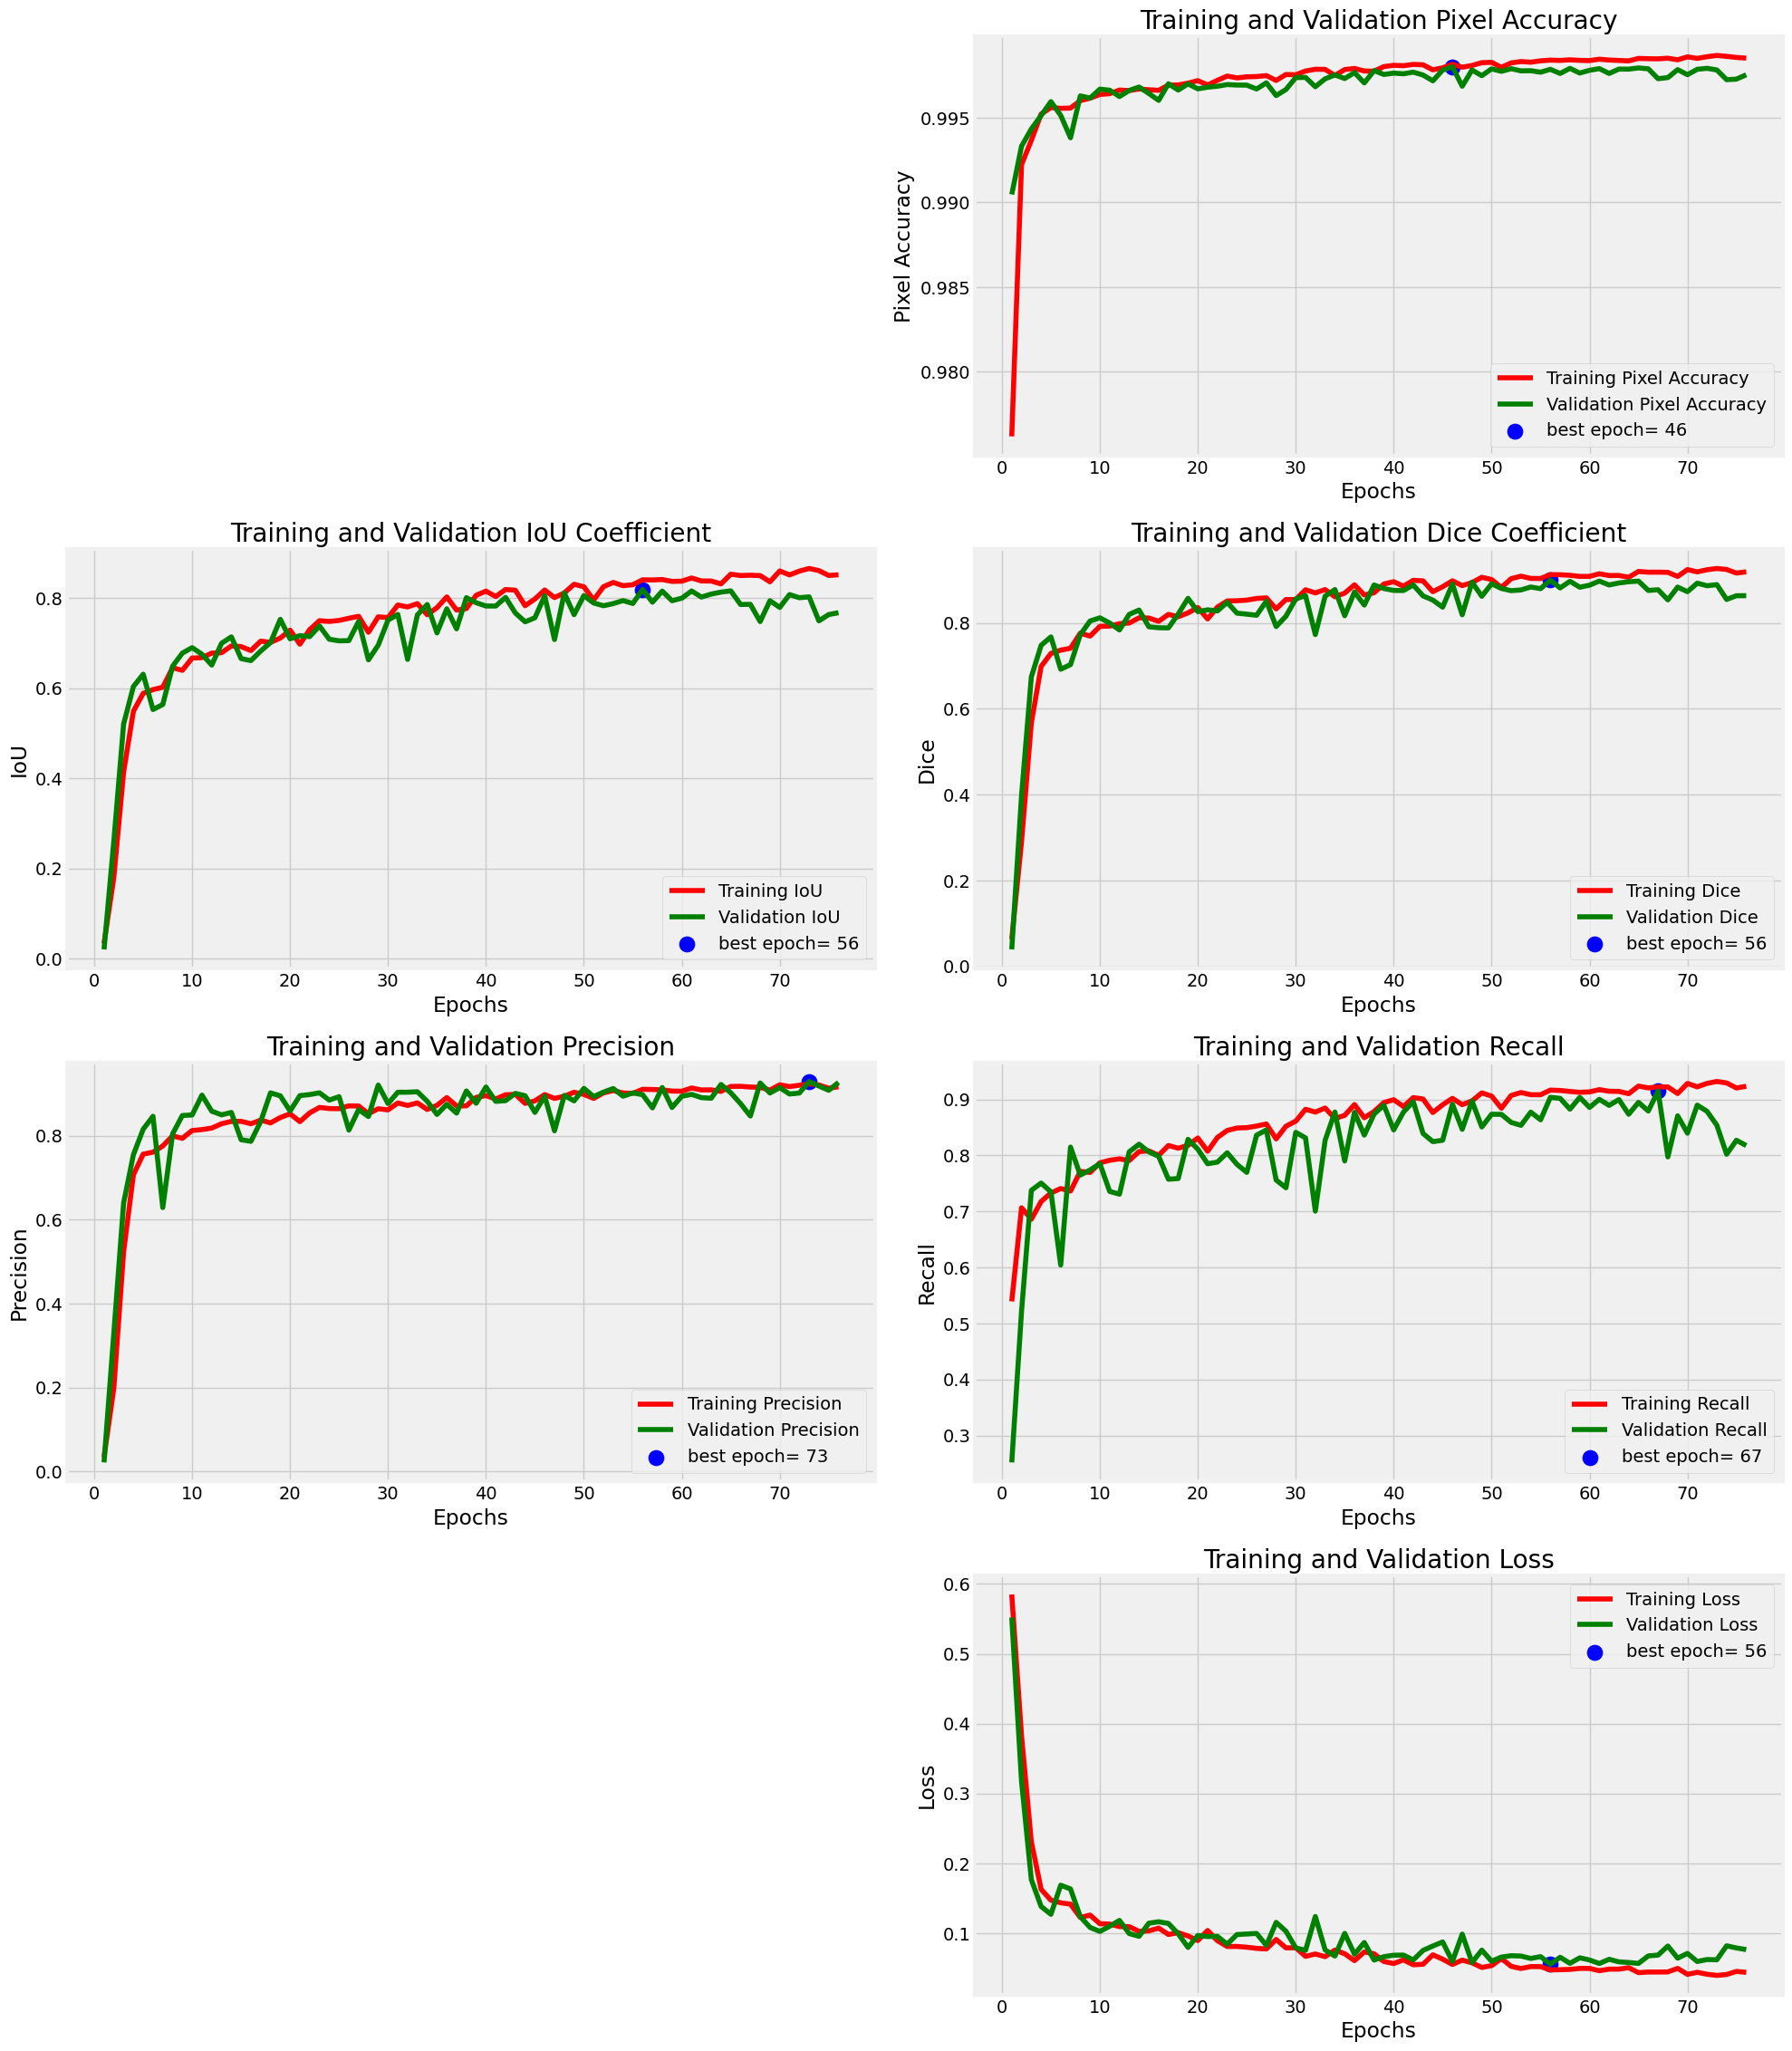

In [31]:
best_metrics = plot_training(history)


In [33]:
print(f"Best Pixel Accuracy: {best_metrics['pixel_accuracy']['value']:.4f} (Epoch {best_metrics['pixel_accuracy']['epoch']})")
print(f"Best IoU Coefficient: {best_metrics['iou_coefficient']['value']:.4f} (Epoch {best_metrics['iou_coefficient']['epoch']})")
print(f"Best Dice Coefficient: {best_metrics['dice_coefficient']['value']:.4f} (Epoch {best_metrics['dice_coefficient']['epoch']})")
print(f"Best Precision: {best_metrics['precision']['value']:.4f} (Epoch {best_metrics['precision']['epoch']})")
print(f"Best Recall: {best_metrics['recall']['value']:.4f} (Epoch {best_metrics['recall']['epoch']})")
print(f"Best Loss: {best_metrics['loss']['value']:.4f} (Epoch {best_metrics['loss']['epoch']})")

Best Pixel Accuracy: 0.9980 (Epoch 46)
Best IoU Coefficient: 0.8193 (Epoch 56)
Best Dice Coefficient: 0.8997 (Epoch 56)
Best Precision: 0.9293 (Epoch 73)
Best Recall: 0.9150 (Epoch 67)
Best Loss: 0.0559 (Epoch 56)


In [34]:
for metric, data in best_metrics.items():
    print(f"\nBest {metric.replace('_', ' ').title()}:")
    print(f"  Validation: {data['value']:.4f}")
    print(f"  Training: {data['training_value']:.4f}")
    print(f"  Epoch: {data['epoch']}")


Best Pixel Accuracy:
  Validation: 0.9980
  Training: 0.9982
  Epoch: 46

Best Iou Coefficient:
  Validation: 0.8193
  Training: 0.8407
  Epoch: 56

Best Dice Coefficient:
  Validation: 0.8997
  Training: 0.9125
  Epoch: 56

Best Precision:
  Validation: 0.9293
  Training: 0.9239
  Epoch: 73

Best Recall:
  Validation: 0.9150
  Training: 0.9223
  Epoch: 67

Best Loss:
  Validation: 0.0559
  Training: 0.0476
  Epoch: 56


In [38]:
from tensorflow.keras.models import load_model

# Saving
model_resunetpp_dmca.save("model_resunetpp_dmca.keras")



In [40]:
model_resunetpp_dmca = load_model(
    "model_resunetpp_dmca.keras", 
    custom_objects={
        "combo_loss": combo_loss,
        "dice_coefficient": dice_coefficient,
        "iou_coef": iou_coef,
        "precision_metric": precision_metric,
        "recall_metric": recall_metric,
        "pixel_accuracy": pixel_accuracy  # If you're also using this from previous example
    }
)

# 𝐏𝐑𝐄𝐃𝐈𝐂𝐓𝐈𝐎𝐍 


In [42]:
from utilities import prediction
        
# making prediction
image_id, mask, has_mask = prediction(X_test, model_resunetpp_dmca)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━

In [43]:
df_pred = prediction(X_test, model_resunetpp_dmca)
df_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━

(['TCGA_DU_8162_19961029/TCGA_DU_8162_19961029_2.tif',
  'TCGA_HT_8563_19981209/TCGA_HT_8563_19981209_21.tif',
  'TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_49.tif',
  'TCGA_FG_8189_20030516/TCGA_FG_8189_20030516_29.tif',
  'TCGA_HT_7616_19940813/TCGA_HT_7616_19940813_28.tif',
  'TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_7.tif',
  'TCGA_FG_6691_20020405/TCGA_FG_6691_20020405_1.tif',
  'TCGA_DU_6405_19851005/TCGA_DU_6405_19851005_13.tif',
  'TCGA_HT_7693_19950520/TCGA_HT_7693_19950520_8.tif',
  'TCGA_DU_7014_19860618/TCGA_DU_7014_19860618_38.tif',
  'TCGA_DU_6407_19860514/TCGA_DU_6407_19860514_12.tif',
  'TCGA_DU_6407_19860514/TCGA_DU_6407_19860514_44.tif',
  'TCGA_DU_6401_19831001/TCGA_DU_6401_19831001_23.tif',
  'TCGA_DU_7300_19910814/TCGA_DU_7300_19910814_3.tif',
  'TCGA_HT_7616_19940813/TCGA_HT_7616_19940813_6.tif',
  'TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_60.tif',
  'TCGA_HT_7879_19981009/TCGA_HT_7879_19981009_6.tif',
  'TCGA_FG_6691_20020405/TCGA_FG_6691_20020405_43.tif',

In [44]:
# creating a dataframe for the result
df_pred = pd.DataFrame({'image_path': image_id,'predicted_mask': mask,'has_mask': has_mask})
df_pred

image_path  \
0    TCGA_DU_8162_19961029/TCGA_DU_8162_19961029_2.tif   
1    TCGA_HT_8563_19981209/TCGA_HT_8563_19981209_21...   
2    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_49...   
3    TCGA_FG_8189_20030516/TCGA_FG_8189_20030516_29...   
4    TCGA_HT_7616_19940813/TCGA_HT_7616_19940813_28...   
..                                                 ...   
290  TCGA_DU_A5TR_19970726/TCGA_DU_A5TR_19970726_14...   
291  TCGA_FG_6691_20020405/TCGA_FG_6691_20020405_20...   
292  TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_47...   
293  TCGA_HT_7473_19970826/TCGA_HT_7473_19970826_14...   
294  TCGA_FG_5964_20010511/TCGA_FG_5964_20010511_12...   

                                        predicted_mask  has_mask  
0                                              No mask         0  
1                                              No mask         0  
2                                              No mask         0  
3    [[[[5.184619e-08], [2.6103196e-08], [4.4344787...         1  
4    [[[[1.0198596e-07], [5.113789e-08], [7.0858846...         1  
..                                                 ...       ...  
290  [[[[8.6435904e-08], [4.448159e-08], [7.7811485...         1  
291  [[[[9.9407075e-08], [5.2284726e-08], [8.610368...         1  
292  [[[[7.784414e-08], [3.798339e-08], [7.094039e-...         1  
293  [[[[8.1770025e-08], [3.898023e-08], [7.02613e-...         1  
294                                            No mask         0  

[295 rows x 3 columns]

In [45]:
# merging original and prediction df
df_pred = X_test.merge(df_pred, on='image_path')
df_pred.head(10)

image_path  \
0  TCGA_DU_8162_19961029/TCGA_DU_8162_19961029_2.tif   
1  TCGA_HT_8563_19981209/TCGA_HT_8563_19981209_21...   
2  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_49...   
3  TCGA_FG_8189_20030516/TCGA_FG_8189_20030516_29...   
4  TCGA_HT_7616_19940813/TCGA_HT_7616_19940813_28...   
5  TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_7.tif   
6  TCGA_FG_6691_20020405/TCGA_FG_6691_20020405_1.tif   
7  TCGA_DU_6405_19851005/TCGA_DU_6405_19851005_13...   
8  TCGA_HT_7693_19950520/TCGA_HT_7693_19950520_8.tif   
9  TCGA_DU_7014_19860618/TCGA_DU_7014_19860618_38...   

                                           mask_path mask  \
0  TCGA_DU_8162_19961029/TCGA_DU_8162_19961029_2_...    0   
1  TCGA_HT_8563_19981209/TCGA_HT_8563_19981209_21...    0   
2  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_49...    1   
3  TCGA_FG_8189_20030516/TCGA_FG_8189_20030516_29...    1   
4  TCGA_HT_7616_19940813/TCGA_HT_7616_19940813_28...    1   
5  TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_7_...    0   
6  TCGA_FG_6691_20020405/TCGA_FG_6691_20020405_1_...    0   
7  TCGA_DU_6405_19851005/TCGA_DU_6405_19851005_13...    0   
8  TCGA_HT_7693_19950520/TCGA_HT_7693_19950520_8_...    0   
9  TCGA_DU_7014_19860618/TCGA_DU_7014_19860618_38...    1   

                                      predicted_mask  has_mask  
0                                            No mask         0  
1                                            No mask         0  
2                                            No mask         0  
3  [[[[5.184619e-08], [2.6103196e-08], [4.4344787...         1  
4  [[[[1.0198596e-07], [5.113789e-08], [7.0858846...         1  
5                                            No mask         0  
6                                            No mask         0  
7                                            No mask         0  
8                                            No mask         0  
9  [[[[6.51956e-08], [3.490862e-08], [6.5612014e-...         1

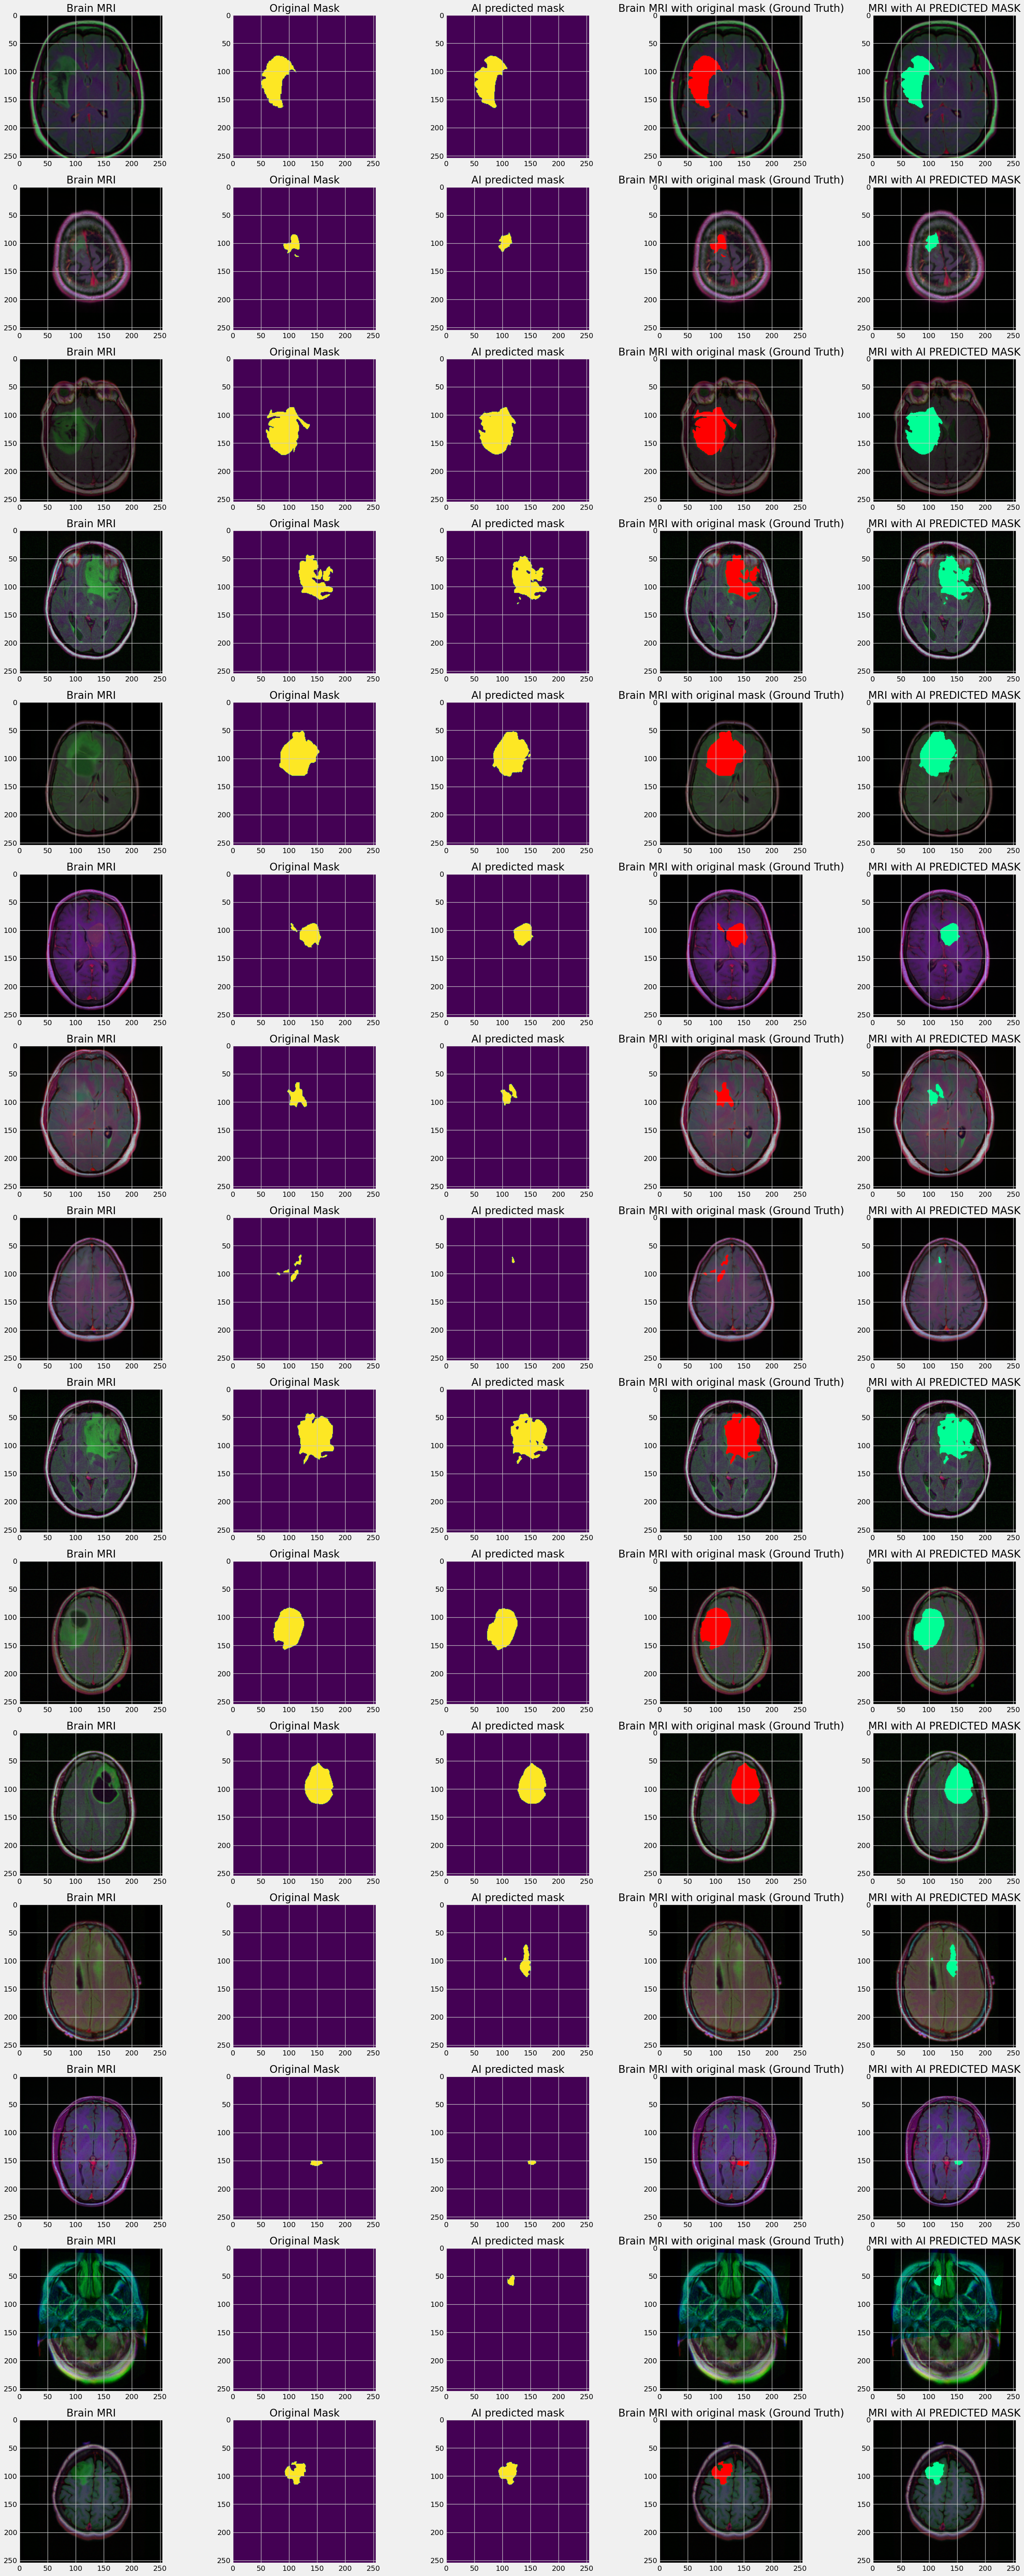

In [49]:
#visualizing prediction
count = 0
fig, axs = plt.subplots(15,5, figsize=(30,70))

for i in range(len(df_pred)):
    if df_pred.has_mask[i]==1 and count<15:
        #read mri images
        img = io.imread(df_pred.image_path[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axs[count][0].imshow(img)
        axs[count][0].title.set_text('Brain MRI')
        
        #read original mask
        mask = io.imread(df_pred.mask_path[i])
        axs[count][1].imshow(mask)
        axs[count][1].title.set_text('Original Mask')
        
        #read predicted mask
        pred = np.array(df_pred.predicted_mask[i]).squeeze().round()
        axs[count][2].imshow(pred)
        axs[count][2].title.set_text('AI predicted mask')
        
        #overlay original mask with MRI
        img[mask==255] = (255,0,0)
        axs[count][3].imshow(img)
        axs[count][3].title.set_text('Brain MRI with original mask (Ground Truth)')
        
        #overlay predicted mask and MRI
        img_ = io.imread(df_pred.image_path[i])
        img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
        img_[pred==1] = (0,255,150)
        axs[count][4].imshow(img_)
        axs[count][4].title.set_text('MRI with AI PREDICTED MASK')
        
        count +=1
    if (count==15):
        break

fig.tight_layout()        